In [10]:
from qiskit import QuantumCircuit, transpile, generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler 
from qiskit.circuit.library import UnitaryGate, HGate, CCXGate
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_aer import AerSimulator
import numpy as np

In [67]:


# Define the unitary matrix
# U = np.array([
#     [1, 0, 0, 0],
#     [0, 1/2, -1/4, 0],
#     [0, 1/4, 1/2, 0],
#     [0, 0, 0, 1]
# ])
aN = (-2 - np.sqrt(3))*np.sqrt(2 - np.sqrt(3))/2
bN = -np.sqrt(1/2 - np.sqrt(3)/4)
cN = (-2 + np.sqrt(3))*np.sqrt(np.sqrt(3) + 2)/2
dN = np.sqrt(np.sqrt(3)/4 + 1/2)

U = np.array([
    [1, 0, 0, 0],
    [0, aN, bN, 0],
    [0, cN, dN, 0],
    [0, 0, 0, 1]
])
print(U)
print(U @ U.T)

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.96592583 -0.25881905  0.        ]
 [ 0.         -0.25881905  0.96592583  0.        ]
 [ 0.          0.          0.          1.        ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 7.29052207e-17 0.00000000e+00]
 [0.00000000e+00 7.29052207e-17 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]


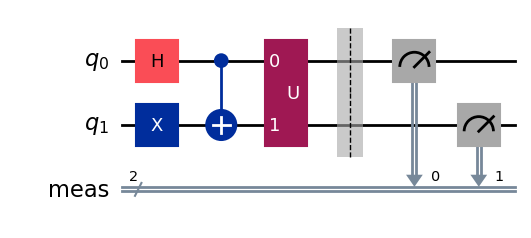

In [68]:

# Create a custom unitary gate
custom_unitary = UnitaryGate(U, label="U")

# Build the quantum circuit
qc = QuantumCircuit(2)
qc.x(1)         # Prepare |01>
qc.h(0)         # Apply Hadamard to create superposition
qc.cx(0, 1)     # Create Bell state (|01> + |10>)/sqrt ( 2)
qc.append(custom_unitary, [0, 1])  # Apply the custom unitary

# Draw the circuit
qc.measure_all()
qc.draw('mpl')

In [69]:
pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3)
isa_circuit = pm.run(qc)
pub = (isa_circuit)

sampler = Sampler(mode = AerSimulator())

In [70]:
job = sampler.run(pubs=[pub], shots = 1000000)
result = job.result()[0]
out_with_freq = result.data.meas.get_counts()
out_with_freq

{'01': 749851, '10': 250149}

In [71]:
_01 = out_with_freq['10']
_10 = out_with_freq['01']
print(_01/1000000)
print(_10/1000000)

0.250149
0.749851


In [34]:
Uc = QuantumCircuit(2)
Uc.append(custom_unitary, [0, 1])

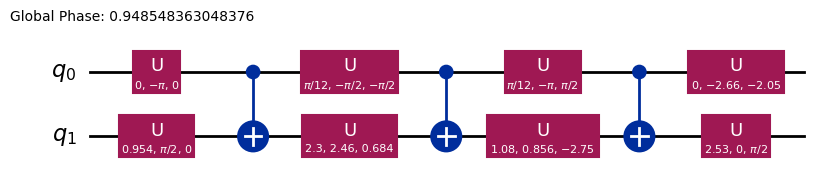

In [35]:
(Uc.decompose()).draw('mpl')


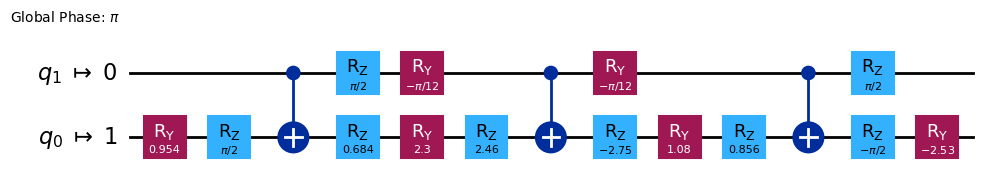

In [43]:
from qiskit.providers.fake_provider import GenericBackendV2 as GBE
pm = generate_preset_pass_manager(backend=GBE(2, basis_gates=['h', 'rz', 'cx', 'x', 'ry']), optimization_level=3)
isa_circuit = pm.run(Uc)
isa_circuit.draw('mpl')

In [52]:
import sympy as sp
a, b, c ,d = sp.symbols('a, b, c, d')
eq = []
eq.append(sp.Eq(a**2 + b**2, 1))
eq.append(sp.Eq(c**2 + d**2, 1))
eq.append(sp.Eq(a*c + b*d, 0))
eq.append(sp.Eq((a+b)**2/2, 3/sp.simplify(4)))
# eq.append(sp.Eq((c+d)**2/2, 3/sp.simplify(4)))
(sp.solve(eq))



[{a: (-2 - sqrt(3))*sqrt(2 - sqrt(3))/2,
  b: -sqrt(1/2 - sqrt(3)/4),
  c: (-2 + sqrt(3))*sqrt(sqrt(3) + 2)/2,
  d: sqrt(sqrt(3)/4 + 1/2)},
 {a: (-2 - sqrt(3))*sqrt(2 - sqrt(3))/2,
  b: -sqrt(1/2 - sqrt(3)/4),
  c: (2 - sqrt(3))*sqrt(sqrt(3) + 2)/2,
  d: -sqrt(sqrt(3)/4 + 1/2)},
 {a: (-2 + sqrt(3))*sqrt(sqrt(3) + 2)/2,
  b: -sqrt(sqrt(3)/4 + 1/2),
  c: (-2 - sqrt(3))*sqrt(2 - sqrt(3))/2,
  d: sqrt(1/2 - sqrt(3)/4)},
 {a: (-2 + sqrt(3))*sqrt(sqrt(3) + 2)/2,
  b: -sqrt(sqrt(3)/4 + 1/2),
  c: sqrt(2 - sqrt(3))*(sqrt(3) + 2)/2,
  d: -sqrt(1/2 - sqrt(3)/4)},
 {a: sqrt(2 - sqrt(3))*(sqrt(3) + 2)/2,
  b: sqrt(1/2 - sqrt(3)/4),
  c: (-2 + sqrt(3))*sqrt(sqrt(3) + 2)/2,
  d: sqrt(sqrt(3)/4 + 1/2)},
 {a: sqrt(2 - sqrt(3))*(sqrt(3) + 2)/2,
  b: sqrt(1/2 - sqrt(3)/4),
  c: (2 - sqrt(3))*sqrt(sqrt(3) + 2)/2,
  d: -sqrt(sqrt(3)/4 + 1/2)},
 {a: (2 - sqrt(3))*sqrt(sqrt(3) + 2)/2,
  b: sqrt(sqrt(3)/4 + 1/2),
  c: (-2 - sqrt(3))*sqrt(2 - sqrt(3))/2,
  d: sqrt(1/2 - sqrt(3)/4)},
 {a: (2 - sqrt(3))*sqrt(sq

In [57]:
ex_out = sp.solve(eq)[0]
a_ex = ex_out[a]
display(a_ex.evalf())
b_ex = ex_out[b]
display(b_ex.evalf())
(a_ex**2 + b_ex**2).evalf()

-0.965925826289068

-0.258819045102521

1.00000000000000

In [ ]:
sp.linear_eq_to_matrix(eq, [a, b, c, d])

array([[1.       , 0.       , 0.       , 0.       ],
       [0.       , 0.9330127, 0.0669873, 0.       ],
       [0.       , 0.0669873, 0.9330127, 0.       ],
       [0.       , 0.       , 0.       , 1.       ]])